In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from numpy.lib.arraysetops import unique
import time
import os
import numpy as np


%pwd

'/home/ubuntu/mmsegmentation/data'

#### Convert labelme mask to catogory ID

In [2]:
def case0():                           
    return 0
def case1():                           
    return 1
def case2():                            
    return 2
def case3():                            
    return 3
def case4():                            
    return 4
def case5():                            
    return 5
def case6():                            
    return 6
def default(): 
    print('Error')                        
    return 255
switch = {
    38: case1,                
    75: case2,
    113: case3,
    14: case4,
    52: case5,
    89: case6,
    0: case0}

def labelconvert(img):
    x,y = np.shape(img)
    for i in range (x):
        for j in range (y):
            img[i][j] = switch.get(int(img[i][j]), default)() 
    return img

#### Build dataset

In [10]:
tic1 = time.perf_counter()


data_root = 'IonoSeg'
gimg_dir = 'IonoSeg/img/'       # gray image
mask_dir = 'IonoSeg/mask/'      # labelme mask
save_input = 'IonoSeg/rgbimg'   # rgb img
save_mask = 'IonoSeg/rgbmask'   # mask with new palette
save_label = 'IonoSeg/label'    # catogiry_id mask
img_dir = 'rgbimg'
ann_dir = 'rgbmask'
catogory_id_dir = 'label'

classes = ('Background', 'E', 'Es-l', 'Es-c', 'F1', 'F2', 'Spread-F')
palette = [[230, 230, 230], [250, 165, 30], [120, 69, 125], [53, 125, 34],
           [0, 11, 123], [130, 20, 12], [120, 121, 80]]      

for path in [save_input, save_mask, save_label]:
    os.makedirs(path, exist_ok=True)

In [11]:
cnt = 0
os.makedirs(save_input, exist_ok=True)

############################# gray image 2 rgb img ###############################
for filename in os.listdir(gimg_dir):
    img = cv2.imread(gimg_dir + "/" + filename) # get rgb image
    img = Image.fromarray(img).convert('RGB')
    img.save(save_input + "/" + filename)
    cnt = cnt + 1
    if cnt % 500 == 0:
        print(cnt, '/', 4311)

tic2 = time.perf_counter()
print(f'Total Time cost {tic2-tic1:}',  's')

500 / 4311
1000 / 4311
1500 / 4311
2000 / 4311
2500 / 4311
3000 / 4311
3500 / 4311
4000 / 4311
Time cost 62.6468419090088 s


In [16]:
############################# labelme mask --> label, cmask ###############################
cnt = 0
tic3 = time.perf_counter()
for filename in os.listdir(mask_dir):
    img = cv2.imread(mask_dir + "/" + filename, cv2.IMREAD_GRAYSCALE)
    seg_map = labelconvert(img)    # 替换
    seg_map = seg_map.astype(np.uint8)
    gray_mask = Image.fromarray(seg_map)
    gray_mask = gray_mask.convert('L')
    gray_mask.save(os.path.join(data_root, catogory_id_dir, filename))
    seg_img = Image.fromarray(seg_map).convert('P')
    seg_img.putpalette(np.array(palette, dtype=np.uint8))
    seg_img.save(os.path.join(data_root, ann_dir, filename))
    cnt = cnt + 1
    if cnt % 500 == 0:
        tic4 = time.perf_counter()
        print(cnt, '/', 4311, 'Time cost:', tic4 - tic3, 's')

500 / 4311 Time cost: 41.51390419801464 s
1000 / 4311 Time cost: 81.58377165001002 s
1500 / 4311 Time cost: 121.13677209700109 s
2000 / 4311 Time cost: 160.7526395340101 s
2500 / 4311 Time cost: 200.07201254900428 s
3000 / 4311 Time cost: 239.69717584201135 s
3500 / 4311 Time cost: 279.344700481015 s
4000 / 4311 Time cost: 318.6872546740051 s


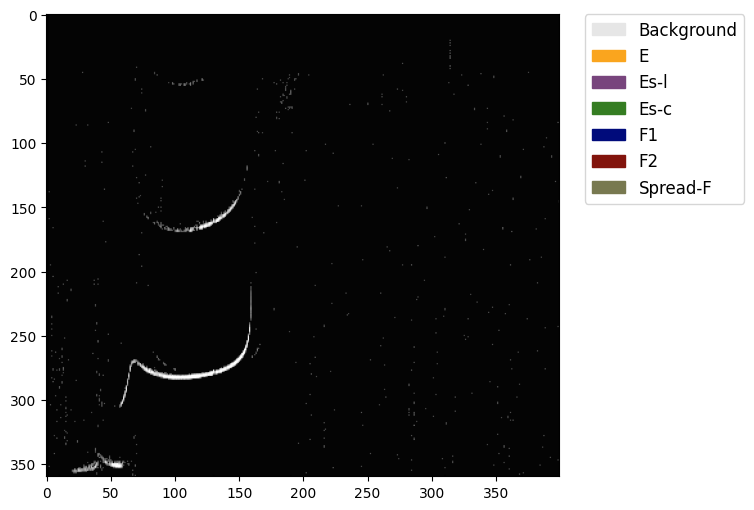

In [17]:
# Let's take a look at the segmentation map we got
img = Image.open(save_input + '/20191031101500.png')
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))
# create a patch (proxy artist) for every color
patches = [mpatches.Patch(color=np.array(palette[i])/255.,
                          label=classes[i]) for i in range(7)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
           fontsize='large')
plt.show()

In [18]:
# Check the directory structure of the tiny data
# Install tree first in your terminal(linux)
!sudo apt-get -q install tree

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 146 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://mirrors.tencentyun.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (462 kB/s)
Selecting previously unselected package tree.
(Reading database ... 110783 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [25]:
!tree IonoSeg/

IonoSeg/
├── img
│   ├── 20130401005200.png
│   ├── 20130401010700.png
│   ├── 20130401012200.png
│   ├── 20130401013700.png
│   ├── 20130401022200.png
│   ├── 20130401023700.png
│   ├── 20130401025200.png
│   ├── 20130401032200.png
│   ├── 20130401033700.png
│   ├── 20130401035200.png
│   ├── 20130401040700.png
│   ├── 20130401042200.png
│   ├── 20130401043700.png
│   ├── 20130401045200.png
│   ├── 20130401050700.png
│   ├── 20130401052200.png
│   ├── 20130401053700.png
│   ├── 20130401055200.png
│   ├── 20130401070700.png
│   ├── 20130401072200.png
│   ├── 20130401075200.png
│   ├── 20130401080700.png
│   ├── 20130401082200.png
│   ├── 20130401083700.png
│   ├── 20130401105200.png
│   ├── 20130401112200.png
│   ├── 20130401122200.png
│   ├── 20130401123700.png
│   ├── 20130401125200.png
│   ├── 20130401130700.png
│   ├── 20130401132200.png
│   ├── 20130401133700.png
│   ├── 20130401142200.png
│   ├── 20130401143700.png
│   ├── 20130401145200.png
│   ├── 20130401150700.png
│   ├── 201